<a href="https://colab.research.google.com/github/tecnocrata/artificial-intelligence-course/blob/master/2.deep-learning-with-python/3_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# From chapter 3 and 3.5
# Classifying newswires into 46 mutually exclusive topics
# Importing Reuters dataset
from keras.datasets import reuters
# Words are ranked by how often they occur (in the training set) and only the num_words most frequent words are kept.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

# Analyzing the data

In [85]:
# We have 8,982 training examples and 2,246 test examples
print (len(train_data))
print (len(test_data))

8982
2246


In [86]:
# As with the IMDB reviews, each example is a list of integers (word indices):
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [87]:
# Again as with IMDB the previous array encodes the news
def decode_review(review):
  word_index = reuters.get_word_index()
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  # Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
  decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in review])
  return decoded_review
decode_review (train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [88]:
# The labels for the previous news is
print (train_labels[0])
# Como dije anteriormente hay 46 posibles labels/clases o salidas por cada noticia
# En este caso se esta asignando el valor 3


3


# Preparing the data
### One-hot encoding (train & test) inputs

In [89]:
import numpy as np
#def vectorize_sequences(sequences, dimension=10000): 
def onehot_encode(sequences, dimension=10000): 
  # Creamos una matriz de ceros de cantidad de elementos x 10000
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    # ponemos 1 solo en la posicion de ese numero
    results[i, sequence] = 1
  return results

# Prepare data, encoding into 0s and 1s vector
x_train = onehot_encode (train_data)
x_test = onehot_encode(test_data)

print (train_data[0])
# Obteniendo elementos unicos
print (set(train_data[0]))
# Cuantos elementos unicos tengo
print ('Unique elements ...', len(set(train_data[0])))
print (x_train[0])
unique, counts = np.unique(x_train[0], return_counts=True)
print ('x train encoded contains 10000 input values')
print (len(x_train[0]))
# Observese que hay 57 1s (unos) dentro de un array de 10 mil. 
# Esto quiere decir que los anteriores 57 Unique elements, estan encodeados como 1s en ese array
print ('there are only 57 ones')
print (dict(zip(unique, counts)))


[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
{1, 2, 258, 4, 5, 6, 7, 8, 9, 10, 11, 134, 132, 270, 15, 16, 272, 17, 19, 12, 22, 3095, 151, 25, 26, 154, 155, 29, 30, 32, 39, 43, 44, 48, 49, 52, 186, 447, 67, 197, 207, 209, 83, 84, 89, 90, 1245, 864, 482, 4579, 102, 1005, 109, 111, 369, 504, 124}
Unique elements ... 57
[0. 1. 1. ... 0. 0. 0.]
x train encoded contains 10000 input values
10000
there are only 57 ones
{0.0: 9943, 1.0: 57}


In [90]:
# Note that there is a built-in way to do this in Keras, using to_categorical function
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)


# Building the model architecture
In the previous example, you used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as infor- mation bottlenecks, permanently dropping relevant information.
For this reason you’ll use larger layers. Let’s go with 64 units

In [91]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
# we end the network with a Dense layer of size 46, because there are 46 possible classes
# The last layer uses a softmax activation. It means the network will output a probability distribution over the 46 different output classes
# In other words: The 46 scores will sum to 1.
model.add(layers.Dense(46, activation='softmax'))

In [92]:
# The best loss function to use in this case is categorical_crossentropy. 
# It measures the distance between two probability distributions: here, 
# between the probability dis- tribution output by the network and the true distribution of the labels. 
# By minimizing the distance between these two distributions, 
# you train the network to output some- thing as close as possible to the true labels.

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Validating the approach
In order to monitor during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples from the original training data.

In [93]:
x_val = x_train[:1000] 
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]

# Now, let’s train the network for 20 epochs.
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 154us/step - loss: 2.6326 - accuracy: 0.4737 - val_loss: 1.7996 - val_accuracy: 0.6140
Epoch 2/20
7982/7982 [==============================] - 1s 163us/step - loss: 1.4497 - accuracy: 0.6971 - val_loss: 1.3207 - val_accuracy: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 162us/step - loss: 1.0475 - accuracy: 0.7724 - val_loss: 1.1254 - val_accuracy: 0.7570
Epoch 4/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.8206 - accuracy: 0.8222 - val_loss: 1.0186 - val_accuracy: 0.7870
Epoch 5/20
7982/7982 [==============================] - 1s 134us/step - loss: 0.6518 - accuracy: 0.8588 - val_loss: 0.9652 - val_accuracy: 0.7900
Epoch 6/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.5224 - accuracy: 0.8908 - val_loss: 0.9159 - val_accuracy: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 158us/step - loss

In [94]:
# Analyzin history.history
history_dict = history.history
print (history_dict.keys())
print (len(history_dict['val_loss']))
print (len(history_dict['val_accuracy']))

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
20
20


### Plotting the training and validation loss

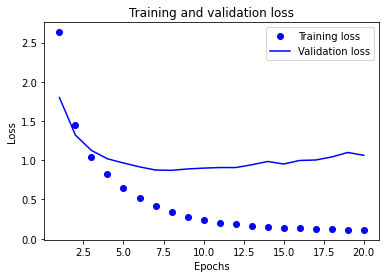

In [95]:
import matplotlib.pyplot as plt
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

# La curva de puntos es la perdida en el entrenamiento, a menor perdida mejor!
# La curva solida es la perdida con los datos de validacion
# Si observamos en el entreamiento la perdida se acerca a cero, lo q es bueno!
# PERO cuando usamos el modelo con los datos de validacion, la perdida se dispara a partir de la 8-9 epoch

### Plotting the training and validation accuracy

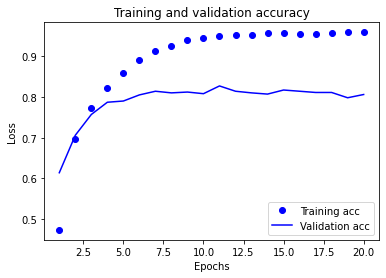

In [96]:
# Graficamos similarmente para los datos de precision (accurracy)
plt.clf() #Clears the figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

# Esto es otra forma de verlo
# Con los datos de entreamiento (puntos) cada vez hay mayor presicion (cerca a 1)
# Con los datos de validacion (solida) a partir de la 6ta-9na epoch, no se mejora la precision
# Esto es el overfiting

# Retraining a model from scratch

In [97]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy']) 
# Esta vez solamente 9 epochs
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
# Probamos el modelo entrenado con los datos de prueba
results = model.evaluate(x_test, one_hot_test_labels)
results

# La precision esta cercana al 80%

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 162us/step - loss: 2.5588 - accuracy: 0.5291 - val_loss: 1.6989 - val_accuracy: 0.6500
Epoch 2/9
7982/7982 [==============================] - 1s 163us/step - loss: 1.3917 - accuracy: 0.7001 - val_loss: 1.3069 - val_accuracy: 0.7060
Epoch 3/9
7982/7982 [==============================] - 1s 166us/step - loss: 1.0504 - accuracy: 0.7749 - val_loss: 1.1600 - val_accuracy: 0.7440
Epoch 4/9
7982/7982 [==============================] - 1s 136us/step - loss: 0.8410 - accuracy: 0.8206 - val_loss: 1.0503 - val_accuracy: 0.7690
Epoch 5/9
7982/7982 [==============================] - 1s 145us/step - loss: 0.6770 - accuracy: 0.8537 - val_loss: 1.0013 - val_accuracy: 0.7840
Epoch 6/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.5498 - accuracy: 0.8844 - val_loss: 0.9406 - val_accuracy: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 156us/step - loss: 0.444

[1.0260190360798755, 0.7791629433631897]

In [98]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy) 
float(np.sum(hits_array)) / len(test_labels)
# Usando un clasificador randomico la precision es cercana al 18% - 19%
# Esto quiere decir que el modelo anterior y su precision cercana al 80% es mucho mejor

0.18210151380231523

# Generating predictions on new data

In [99]:
# Vamos a usar el modelo en datos nuevos
predictions = model.predict(x_test)

# Tenemos 2246 datos de prueba
print (x_test.shape)
# Como resultado de la prediccion tenemos 2246 predicciones, cada una con 46 posibles clases
print (predictions.shape)

print (predictions[:2])

(2246, 10000)
(2246, 46)
[[1.57957795e-04 7.85357915e-05 5.65465234e-06 9.45796072e-01
  3.90761904e-02 3.16084916e-05 1.81761308e-04 7.09448796e-05
  1.72466121e-03 5.24415955e-05 2.24832274e-05 7.03380303e-03
  7.54322537e-05 1.84312958e-04 2.93324265e-04 4.08330270e-05
  3.31815245e-04 2.00982104e-05 7.88871694e-05 3.55502816e-05
  1.74652936e-03 1.13044574e-03 3.25170113e-05 2.95032914e-05
  9.11855568e-06 7.20847820e-05 5.24715324e-06 2.05301098e-04
  2.17677716e-05 1.83567608e-04 2.52998580e-04 3.19192157e-04
  7.39200595e-06 3.17830272e-05 9.32413241e-05 3.32658201e-05
  1.38445088e-04 2.05781635e-05 2.08754482e-05 1.38004412e-04
  1.89076945e-05 3.08933086e-05 1.00147745e-05 1.44320395e-04
  9.44279600e-06 2.18853666e-06]
 [1.87831896e-03 1.01682730e-02 6.63932636e-02 2.29556426e-05
  2.35371990e-04 1.04038296e-02 3.69010319e-04 2.08308775e-04
  4.99708462e-04 4.97972779e-03 7.66133070e-01 4.27722419e-03
  4.51810332e-03 4.58003866e-04 3.07362876e-04 1.27286278e-03
  4.70571127

In [100]:
# Por ejemplo la prediccion para la primera entrada, tiene esas 46 salidas
predictions[0].shape

(46,)

In [101]:
# Como dijimos anteriormente, la suma de todas las 46 probabilidades, debe ser 1
np.sum(predictions[0])

0.9999999

In [102]:
# Obtenemos cual es la clase mas probable, es decir con la mayor probabilidad entre todas
np.argmax(predictions[0])

3

# Additional tests

In [112]:
# Si queremos usar los inputs y outputs como numeros enteros, SIN usar one-hot encoding
# Podemos usar esta funcion de perdida: sparse_categorical_crossentropy
y_train = np.array(train_labels) 
y_test = np.array(test_labels)

x_val = x_train[:1000] 
partial_x_train = x_train[1000:]
y_val = y_train[:1000] #one_hot_train_labels[:1000] 
partial_y_train = y_train[1000:] #one_hot_train_labels[1000:]

# Esta es la arquitectura inicial!!!
# model = models.Sequential()
# model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
# model.add(layers.Dense(64, activation='relu')) 
# model.add(layers.Dense(46, activation='softmax'))
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy']) 
# # Esta vez solamente 9 epochs
# model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
# # Probamos el modelo entrenado con los datos de prueba
# results = model.evaluate(x_test, one_hot_test_labels)
# results


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
# # Note this won't affect the model output shape, it still outputs ten probability scores for each input sample.!!!!!!!!!!!
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
# Probamos el modelo entrenado con los datos de prueba
results = model.evaluate(x_test, y_test) #one_hot_test_labels
results

# Obtenemos similares resultados cuando usamos one-hot encoding

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 157us/step - loss: 2.6070 - acc: 0.5053 - val_loss: 1.7291 - val_acc: 0.6370
Epoch 2/9
7982/7982 [==============================] - 1s 131us/step - loss: 1.4152 - acc: 0.7058 - val_loss: 1.2990 - val_acc: 0.7140
Epoch 3/9
7982/7982 [==============================] - 1s 128us/step - loss: 1.0396 - acc: 0.7762 - val_loss: 1.1328 - val_acc: 0.7620
Epoch 4/9
7982/7982 [==============================] - 1s 130us/step - loss: 0.8204 - acc: 0.8232 - val_loss: 1.0428 - val_acc: 0.7830
Epoch 5/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.6589 - acc: 0.8604 - val_loss: 0.9884 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 1s 140us/step - loss: 0.5282 - acc: 0.8899 - val_loss: 0.9443 - val_acc: 0.8070
Epoch 7/9
7982/7982 [==============================] - 1s 166us/step - loss: 0.4265 - acc: 0.9110 - val_loss: 0.9286 - val_acc: 0.8120
Epoch 8

[0.9924344706514109, 0.780053436756134]

# The importance of having sufficiently large intermediate layers
You should avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what happens when you introduce an information bottleneck by having intermediate layers that are significantly less than 46-dimensional: for example, 4-dimensional.

In [114]:
# Volvemos a preparar los datos de entrenamiento por que se cambiaron en la anterior prueba
x_val = x_train[:1000] 
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(4, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

# Probamos el modelo entrenado con los datos de prueba
results = model.evaluate(x_test, one_hot_test_labels)
results
# Se observa que la precision solo alcanza el 70% - 71% esto es debido a que usamos solo neuronas en una capa intermedia

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 210us/step - loss: 3.2181 - accuracy: 0.1654 - val_loss: 2.4674 - val_accuracy: 0.2420
Epoch 2/20
7982/7982 [==============================] - 2s 210us/step - loss: 1.8814 - accuracy: 0.5227 - val_loss: 1.6120 - val_accuracy: 0.5810
Epoch 3/20
7982/7982 [==============================] - 2s 214us/step - loss: 1.4007 - accuracy: 0.6059 - val_loss: 1.4510 - val_accuracy: 0.6100
Epoch 4/20
7982/7982 [==============================] - 2s 205us/step - loss: 1.1831 - accuracy: 0.6783 - val_loss: 1.3468 - val_accuracy: 0.6590
Epoch 5/20
7982/7982 [==============================] - 2s 220us/step - loss: 1.0277 - accuracy: 0.7403 - val_loss: 1.3106 - val_accuracy: 0.6880
Epoch 6/20
7982/7982 [==============================] - 2s 192us/step - loss: 0.9130 - accuracy: 0.7720 - val_loss: 1.3028 - val_accuracy: 0.7010
Epoch 7/20
7982/7982 [==============================] - 1s 169us/step - loss

[2.1288946150459567, 0.7079252004623413]

# Conclusions
- If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.
- In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution over the N output classes.
- Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.
- There are two ways to handle labels in multiclass classification:
  * Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
  * Encoding the labels as integers and using the sparse_categorical_crossentropy
loss function
- If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your network due to intermediate layers that are too small.

# Homework
- Try using larger or smaller layers: 32 units, 128 units, and so on.
- You used two hidden layers. Now try using a single hidden layer, or three hid-
den layers.